<a href="https://colab.research.google.com/github/jyotidabass/Chatbot-with-Google-GEMINI-API/blob/main/Google_GEMINI_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Setting Up Your Basecamp

Before embarking on your Gemini adventure, some preparation is key.

Obtain an API Key: Head over to the Google AI Studio (https://makersuite.google.com/u/2/app/apikey?pli=1) and activate the key. This grants you an API key — your passport to the Gemini realm.![Screenshot 2024-01-20 214922.png](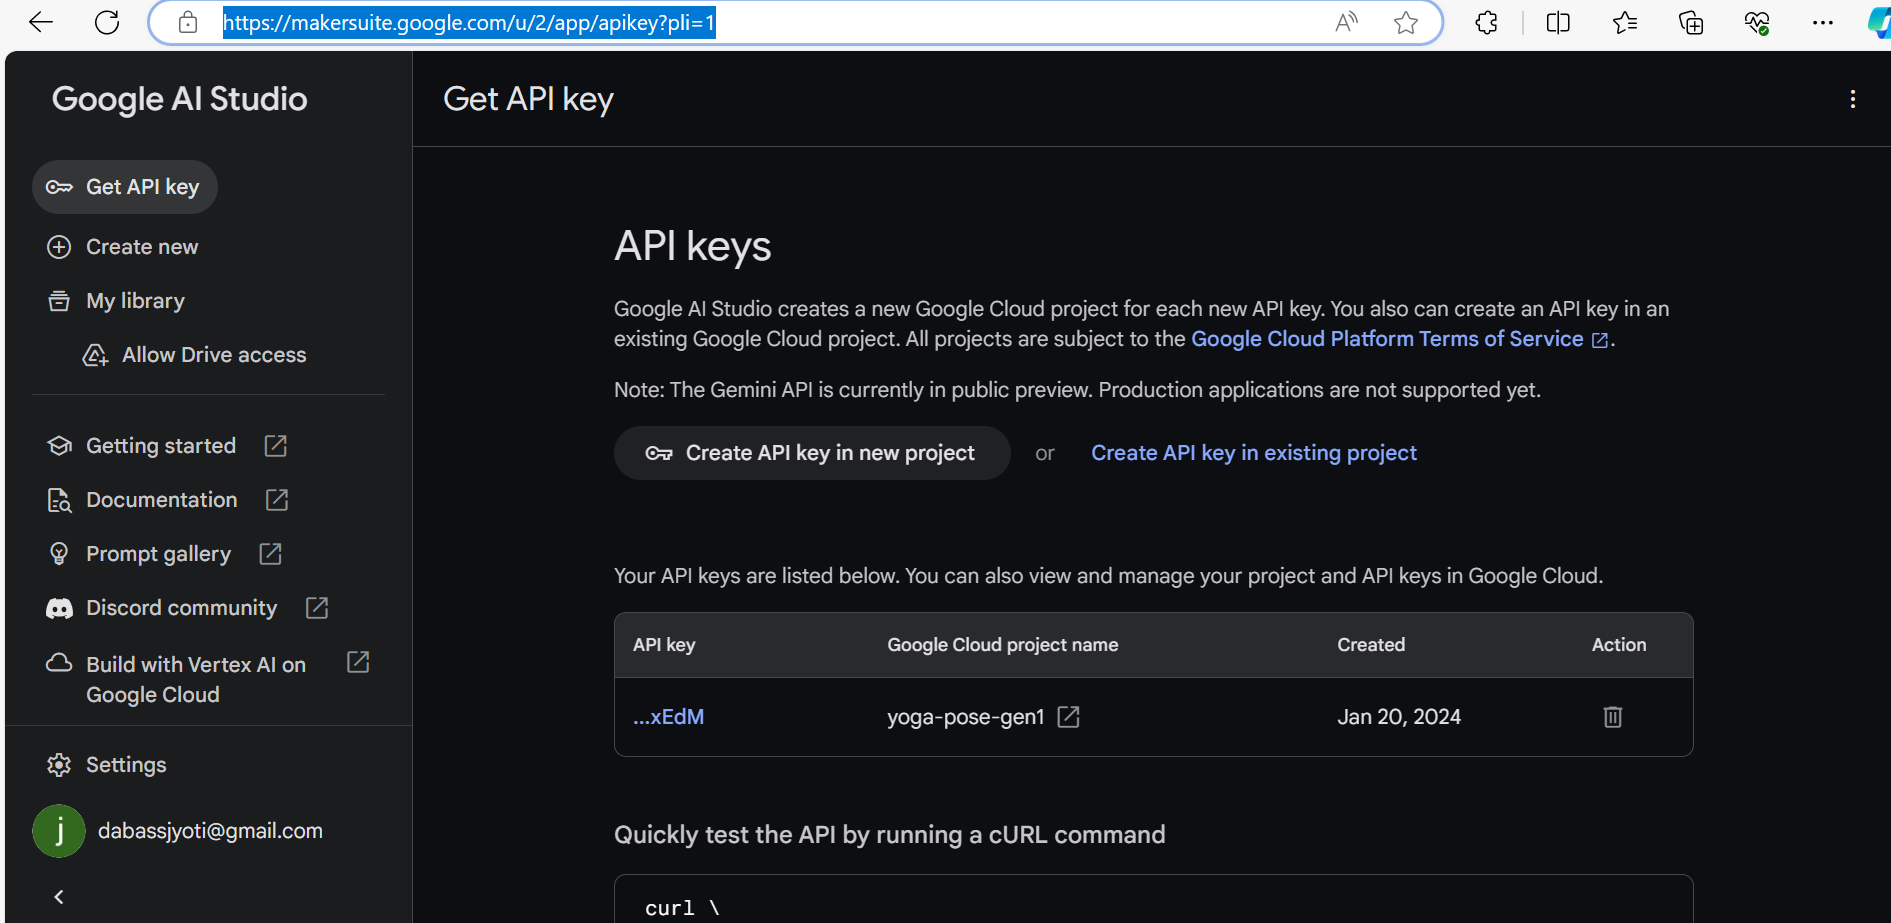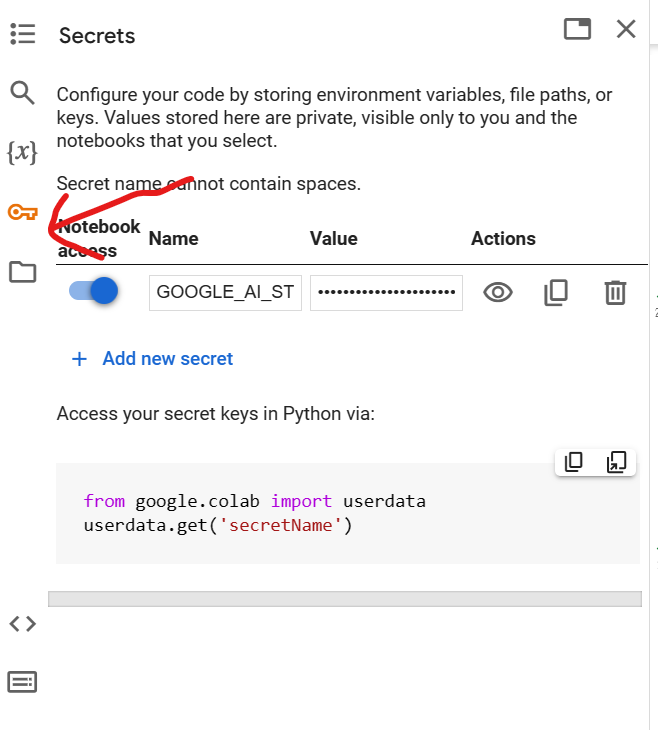)

In [1]:
!pip -q install google-generativeai==0.3.0
!pip -q install google-ai-generativelanguage==0.4.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.9/145.9 kB 1.8 MB/s eta 0:00:00


Choose Your Tools: Decide how you’ll interact with the API. Here we will use Google colab. Open google colab and save the API key under secrets tab.

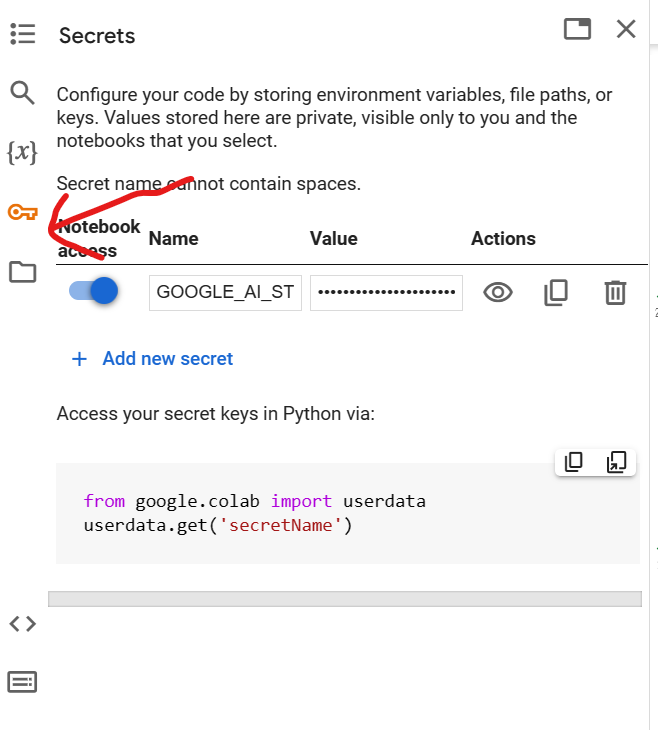

**Gemini Pro Basics**

Model setup

In [3]:
# setup
import google.generativeai as genai
from google.colab import userdata

from IPython.display import display
from IPython.display import Markdown

GOOGLE_AI_STUDIO = userdata.get('GOOGLE_AI_STUDIO')

genai.configure(api_key=GOOGLE_AI_STUDIO)

Here you will get list of models from Google AI studio. You need to select ‘gemini-pro’ from the list.

In [4]:
for m in genai.list_models():
    print(m.name)
    print(m.supported_generation_methods)

models/chat-bison-001
['generateMessage', 'countMessageTokens']
models/text-bison-001
['generateText', 'countTextTokens', 'createTunedTextModel']
models/embedding-gecko-001
['embedText', 'countTextTokens']
models/gemini-pro
['generateContent', 'countTokens']
models/gemini-pro-vision
['generateContent', 'countTokens']
models/embedding-001
['embedContent', 'countTextTokens']
models/aqa
['generateAnswer']


Configuring the Model
Gemini Pro thrives on clear instructions. To get the best results, consider:

Formulating concise questions: The more specific your prompt, the more relevant the output.
Providing context: Sharing relevant information or examples can guide Gemini towards your desired outcome.
Experimenting with parameters: The API offers parameters like temperature and top_p to fine-tune the creative direction and diversity of responses.

In [21]:
# Set up the model
generation_config = {
  "temperature": 0.9,
  "top_p": 1,
  "top_k": 1,
  "max_output_tokens": 2048,
}

safety_settings = [
  {
    "category": "HARM_CATEGORY_HARASSMENT",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  },
  {
    "category": "HARM_CATEGORY_HATE_SPEECH",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  },
  {
    "category": "HARM_CATEGORY_SEXUALLY_EXPLICIT",
    "threshold": "BLOCK_ONLY_HIGH"
  },
  {
    "category": "HARM_CATEGORY_DANGEROUS_CONTENT",
    "threshold": "BLOCK_ONLY_HIGH"
  }
]


model = genai.GenerativeModel(model_name="gemini-pro",
                              generation_config=generation_config,
                              safety_settings=safety_settings)


prompt_parts = [
  "What is the largest planet?",
]


response = model.generate_content(prompt_parts)
print(response.text)

Jupiter


In [22]:
response.prompt_feedback

safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: NEGLIGIBLE
}

**Lets take one Chat example **

In [24]:
# Set up the model
generation_config = {
  "temperature": 0.9,
  "top_p": 1,
  "top_k": 1,
  "max_output_tokens": 2048,
}

safety_settings = [
  {
    "category": "HARM_CATEGORY_HARASSMENT",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  },
  {
    "category": "HARM_CATEGORY_HATE_SPEECH",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  },
  {
    "category": "HARM_CATEGORY_SEXUALLY_EXPLICIT",
    "threshold": "BLOCK_ONLY_HIGH"
  },
  {
    "category": "HARM_CATEGORY_DANGEROUS_CONTENT",
    "threshold": "BLOCK_ONLY_HIGH"
  }
]

model = genai.GenerativeModel(model_name="gemini-pro",
                              generation_config=generation_config,
                              safety_settings=safety_settings)


chat = model.start_chat(history=[])


chat.send_message("Tell me about the planet comes after Mars from the Sun?")

Markdown(chat.last.text)

Jupiter

In [25]:
chat.send_message("Tell me about the planet comes after Jupyter from the Sun?")

Markdown(chat.last.text)

Saturn

Saturn is the sixth planet from the Sun and the second-largest in the Solar System, after Jupiter. It is a gas giant with a radius of about nine times that of Earth and a mass of about 95 times that of Earth. Saturn is best known for its prominent ring system, which is made up of countless small particles of ice and rock.

Saturn's atmosphere is composed mostly of hydrogen and helium, with traces of other gases such as ammonia, methane, water vapor, and hydrogen sulfide. The planet has a thick layer of clouds, which makes it difficult to see the surface. Saturn's interior is thought to be mostly made up of hydrogen and helium, with a rocky core.

Saturn has a total of 62 moons, the largest of which is Titan. Titan is larger than Mercury and is the only moon in the Solar System with a dense atmosphere. Titan is also the only moon known to have liquid on its surface, in the form of lakes and rivers of methane and ethane.

Saturn is a beautiful and fascinating planet that has been studied by scientists for centuries. It is a popular target for space missions, and the Cassini-Huygens mission, which explored Saturn and its moons from 2004 to 2017, provided a wealth of new information about the planet and its system.

In [26]:
for message in chat.history:
  display(Markdown(f'**{message.role}**: {message.parts[0].text}'))

**user**: Tell me about the planet comes after Mars from the Sun?

**model**: Jupiter

**user**: Tell me about the planet comes after Jupyter from the Sun?

**model**: Saturn

Saturn is the sixth planet from the Sun and the second-largest in the Solar System, after Jupiter. It is a gas giant with a radius of about nine times that of Earth and a mass of about 95 times that of Earth. Saturn is best known for its prominent ring system, which is made up of countless small particles of ice and rock.

Saturn's atmosphere is composed mostly of hydrogen and helium, with traces of other gases such as ammonia, methane, water vapor, and hydrogen sulfide. The planet has a thick layer of clouds, which makes it difficult to see the surface. Saturn's interior is thought to be mostly made up of hydrogen and helium, with a rocky core.

Saturn has a total of 62 moons, the largest of which is Titan. Titan is larger than Mercury and is the only moon in the Solar System with a dense atmosphere. Titan is also the only moon known to have liquid on its surface, in the form of lakes and rivers of methane and ethane.

Saturn is a beautiful and fascinating planet that has been studied by scientists for centuries. It is a popular target for space missions, and the Cassini-Huygens mission, which explored Saturn and its moons from 2004 to 2017, provided a wealth of new information about the planet and its system.

# Let try now with Gemini Pro Vision

In [27]:
# lets get some images
!curl -o saturn_image.jpg https://photojournal.jpl.nasa.gov/jpeg/PIA12567.jpg
!curl -o earth_image.jpg https://upload.wikimedia.org/wikipedia/commons/thumb/9/97/The_Earth_seen_from_Apollo_17.jpg/1200px-The_Earth_seen_from_Apollo_17.jpg
!curl -o neptune_image.jpg https://smd-cms.nasa.gov/wp-content/uploads/2023/09/PIA01492-1.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 98353  100 98353    0     0   249k      0 --:--:-- --:--:-- --:--:--  249k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  379k  100  379k    0     0  1165k      0 --:--:-- --:--:-- --:--:-- 1166k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  252k  100  252k    0     0   563k      0 --:--:-- --:--:-- --:--:--  563k


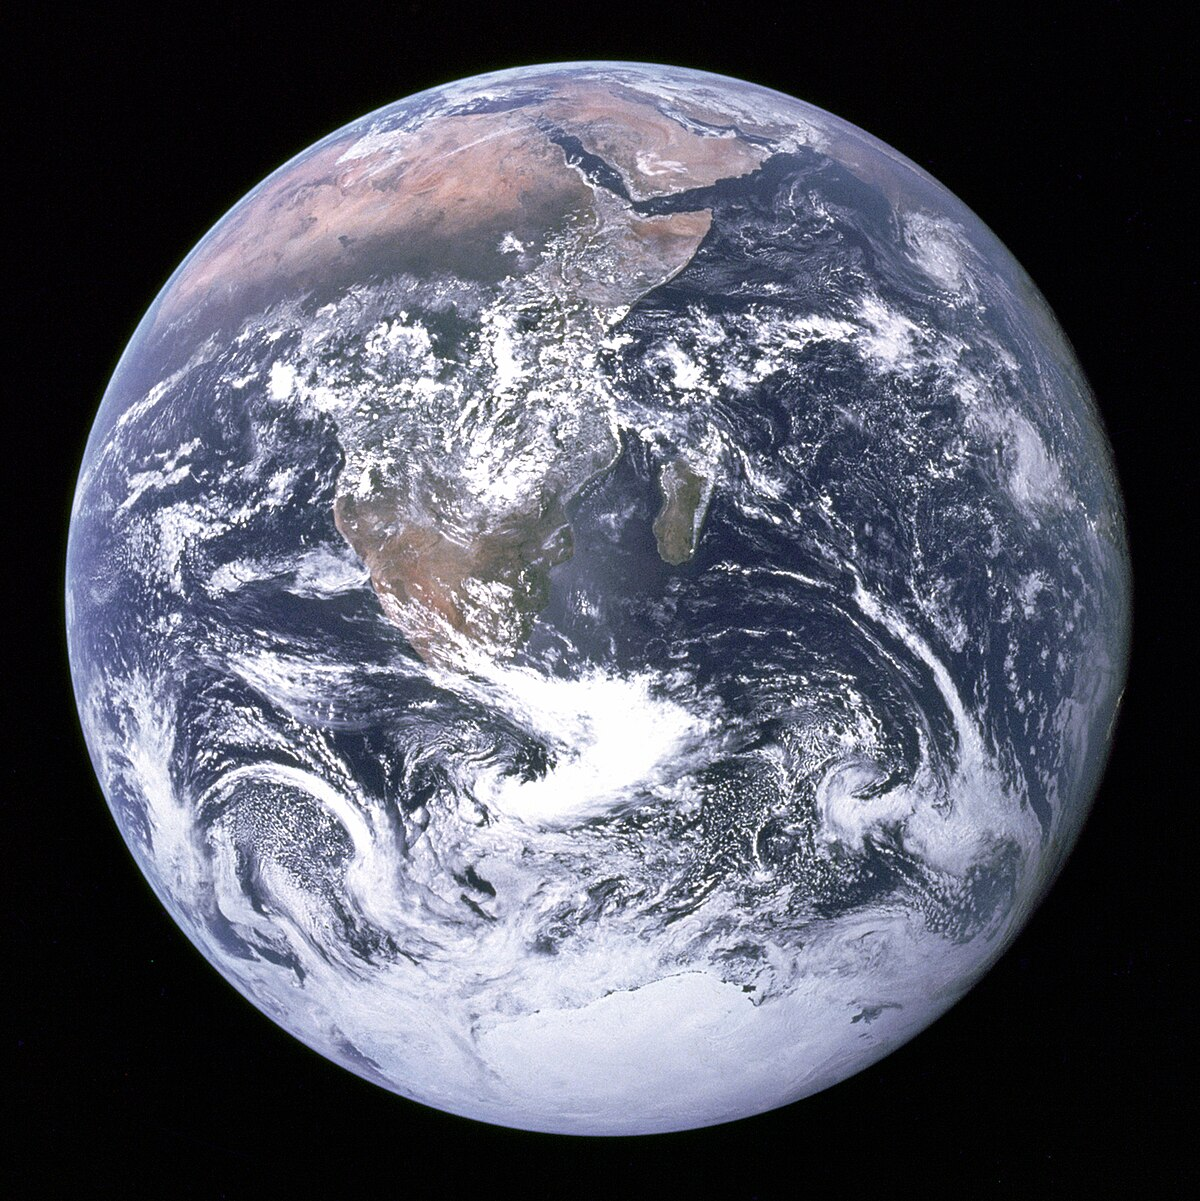

In [28]:
import PIL.Image

img = PIL.Image.open('earth_image.jpg')
img

In [29]:
new_size = (200, 200)
img = img.resize(new_size)

In [30]:
model = genai.GenerativeModel('gemini-pro-vision')
response = model.generate_content(img)


In [31]:
response = model.generate_content(["Give me the name of the planet and some movies that have featured this:", img], stream=True)
response.resolve()

In [32]:
Markdown(response.text)

 The planet is Earth.

Some movies that have featured Earth are:

* The Matrix (1999)
* The Lord of the Rings: The Fellowship of the Ring (2001)
* Avatar (2009)
* Interstellar (2014)
* The Martian (2015)